In [1]:
from utils.visual import *
from utils.functions import get_label_counts,get_number_of_images_annd_annotationes,get_number_of_multilabels
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

## Raw Datsets

In [2]:
with open("./data/coco_data/emotion_coco/test/_annotations.coco.json",'r') as f:

    data = json.load(f)

    print(data.keys())

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])


In [3]:
data['annotations'][0]

{'id': 0,
 'image_id': 0,
 'category_id': 4,
 'bbox': [29, 10, 111, 146],
 'area': 16206,
 'segmentation': [],
 'iscrowd': 0}

In [4]:
data['images'][0]

{'id': 0,
 'license': 1,
 'file_name': 'pixiz-06-12-2022-14-54-07_jpg.rf.02bd8883120f8604d6bac9c13e20d232.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-12-07T22:37:42+00:00'}

In [5]:
emotion_annotations = './data/coco_data/emotion_coco/full_annotations.json'
affective_annotations = './data/coco_data/affective_coco/full_annotations.json'

In [6]:
with open(emotion_annotations,'r') as file_1, open(affective_annotations,'r') as file_2:
    em_ann = json.load(file_1)
    aff_ann = json.load(file_2)

In [7]:
em_ann['images']

[{'id': 0,
  'license': 1,
  'file_name': '64_jpg.rf.3dbdc305ee354510988064dc2fe7c54d.jpg',
  'height': 586,
  'width': 586,
  'date_captured': '2023-12-07T22:37:41+00:00'},
 {'id': 1,
  'license': 1,
  'file_name': 'S034_001_00000027_png_jpg.rf.3dbab45c34ecf917109f0bca9b397e34.jpg',
  'height': 602,
  'width': 602,
  'date_captured': '2023-12-07T22:37:41+00:00'},
 {'id': 2,
  'license': 1,
  'file_name': 'fearful_730_jpg.rf.3d9c29e16e33294c37a3a38d6873bc0b.jpg',
  'height': 576,
  'width': 576,
  'date_captured': '2023-12-07T22:37:41+00:00'},
 {'id': 3,
  'license': 1,
  'file_name': 'happy172_jpg.rf.3dca6e93e6aaa49ca63e02e14f7c6677.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-12-07T22:37:41+00:00'},
 {'id': 4,
  'license': 1,
  'file_name': 'S057_006_00000031_png_jpg.rf.3d8df25b82088cb8766873900923b458.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-12-07T22:37:41+00:00'},
 {'id': 5,
  'license': 1,
  'file_name': 'S053_001_00000021_png_jpg.rf.3d9a1

In [8]:
aff_ann['images'][0]

{'id': 0,
 'license': 1,
 'file_name': 'img_001179_jpg.rf.bff9f8d89e71e67b787553502cae60c6.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-02-13T11:28:22+00:00'}

In [9]:
emotion_data_images,emotion_data_annotationes = get_number_of_images_annd_annotationes(emotion_annotations)
affective_data_images,affective_data_annotationes = get_number_of_images_annd_annotationes(affective_annotations)

print(f"Emotion dataset\n\tImages: {emotion_data_images}\n\tAnnotations: {emotion_data_annotationes}\n\n\
Affective dataset\n\tImages: {affective_data_images}\n\tAnnotationes: {affective_data_annotationes}")

Emotion dataset
	Images: 21263
	Annotations: 61722

Affective dataset
	Images: 2008
	Annotationes: 2008


In [10]:
multi_count,multi_images = get_number_of_multilabels(emotion_annotations)

In [11]:
print("Number of multilabel images: ",multi_count)

Number of multilabel images:  2970


In [12]:
multi_count/emotion_data_images

0.1396792550439731

In [13]:
emotion_data_annotationes - (emotion_data_images-multi_count)

43429

In [14]:
43429/emotion_data_annotationes

0.7036226953112342

In [15]:
2741

2741

In [16]:
emotion_data_images + affective_data_images

23271

In [17]:
emotion_counts = get_label_counts(emotion_annotations,df=True)
affective_counts = get_label_counts(affective_annotations,df=True)

In [18]:
emotion_counts

Label  Count  Proportion
0     Angry  11311       18.33
1   Disgust   2757        4.47
2     Happy  15692       25.42
3   Natural  10201       16.53
4       Sad   8635       13.99
5  Surprise  13126       21.27

In [19]:
affective_counts

Label  Count  Proportion
0      Boredom    348       17.33
1    Confusion    316       15.74
2      Engaged    389       19.37
3  Frustration    365       18.18
4       Sleepy    372       18.53
5      Yawning    218       10.86

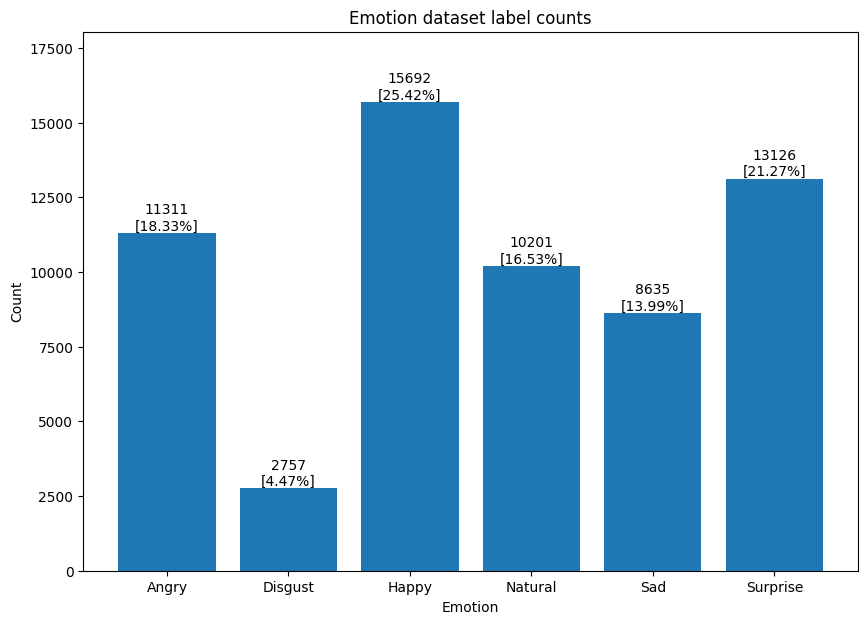

In [20]:
plot_label_counts(emotion_counts,'Emotion dataset label counts')

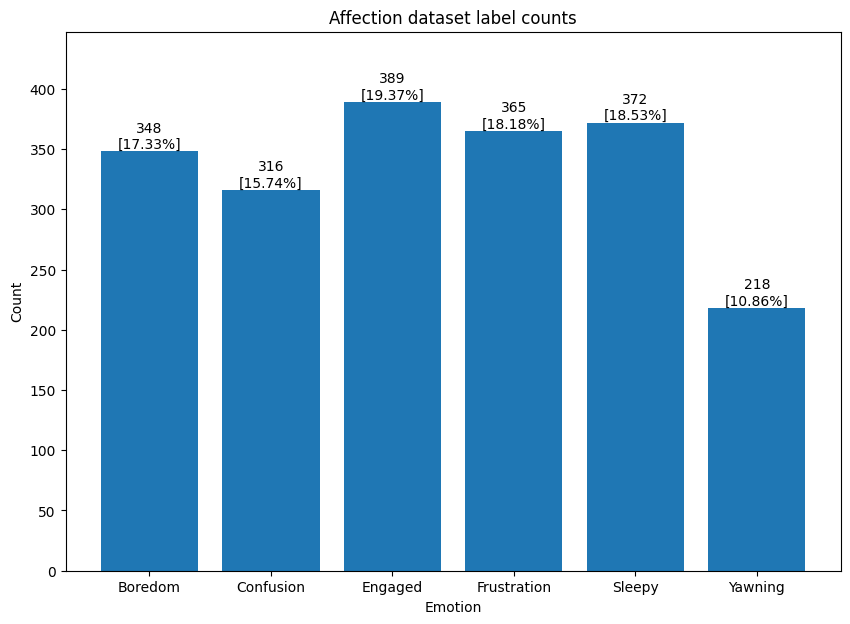

In [21]:
plot_label_counts(affective_counts,'Affection dataset label counts')

In [22]:
  dd=           { "Happy":"Positive",
              
              "Surprise":"Surprise",

              
              "Natural":"Natural",
              
              "Angry":"Negative",
              "Sad":"Negative",
              "Disgust":"Negative",
              "Boredom":"Negative",
              "Confusion":"Negative",
              "Frustration":"Negative",
                            
              "Yawning":"Negative",
              "Sleepy":"Negative",
              
              "Engaged":"Positive"
}

In [23]:
dd

{'Happy': 'Positive',
 'Surprise': 'Surprise',
 'Natural': 'Natural',
 'Angry': 'Negative',
 'Sad': 'Negative',
 'Disgust': 'Negative',
 'Boredom': 'Negative',
 'Confusion': 'Negative',
 'Frustration': 'Negative',
 'Yawning': 'Negative',
 'Sleepy': 'Negative',
 'Engaged': 'Positive'}

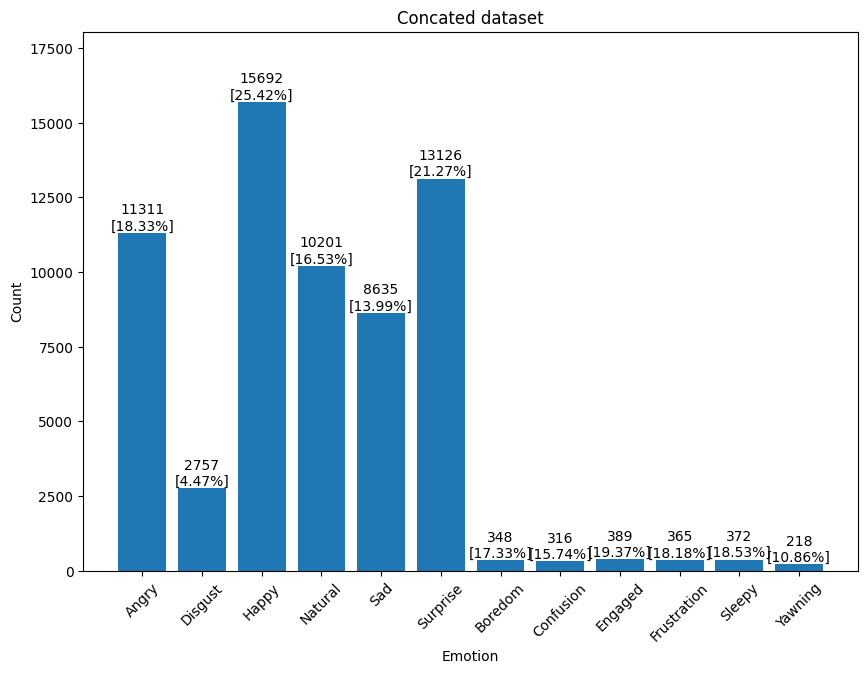

In [24]:
total_dataset = pd.concat([emotion_counts,affective_counts])
plot_label_counts(total_dataset,'Concated dataset')

In [25]:
total_dataset

Label  Count  Proportion
0        Angry  11311       18.33
1      Disgust   2757        4.47
2        Happy  15692       25.42
3      Natural  10201       16.53
4          Sad   8635       13.99
5     Surprise  13126       21.27
0      Boredom    348       17.33
1    Confusion    316       15.74
2      Engaged    389       19.37
3  Frustration    365       18.18
4       Sleepy    372       18.53
5      Yawning    218       10.86

In [26]:
total_dataset

Label  Count  Proportion
0        Angry  11311       18.33
1      Disgust   2757        4.47
2        Happy  15692       25.42
3      Natural  10201       16.53
4          Sad   8635       13.99
5     Surprise  13126       21.27
0      Boredom    348       17.33
1    Confusion    316       15.74
2      Engaged    389       19.37
3  Frustration    365       18.18
4       Sleepy    372       18.53
5      Yawning    218       10.86

## Data balancing

In [2]:
image_root_new = "./data/full_data/balanced_nnps/images/"
image_root_old = './data/full_data/full_nnps/nnps_full_images/'
annotations_file_balanced = "./data/full_data/balanced_nnps/balanced_dataset_annotations.json"
annotations_file_original = './data/full_data/full_nnps/nnps_annotations.json'
number_of_images = 4

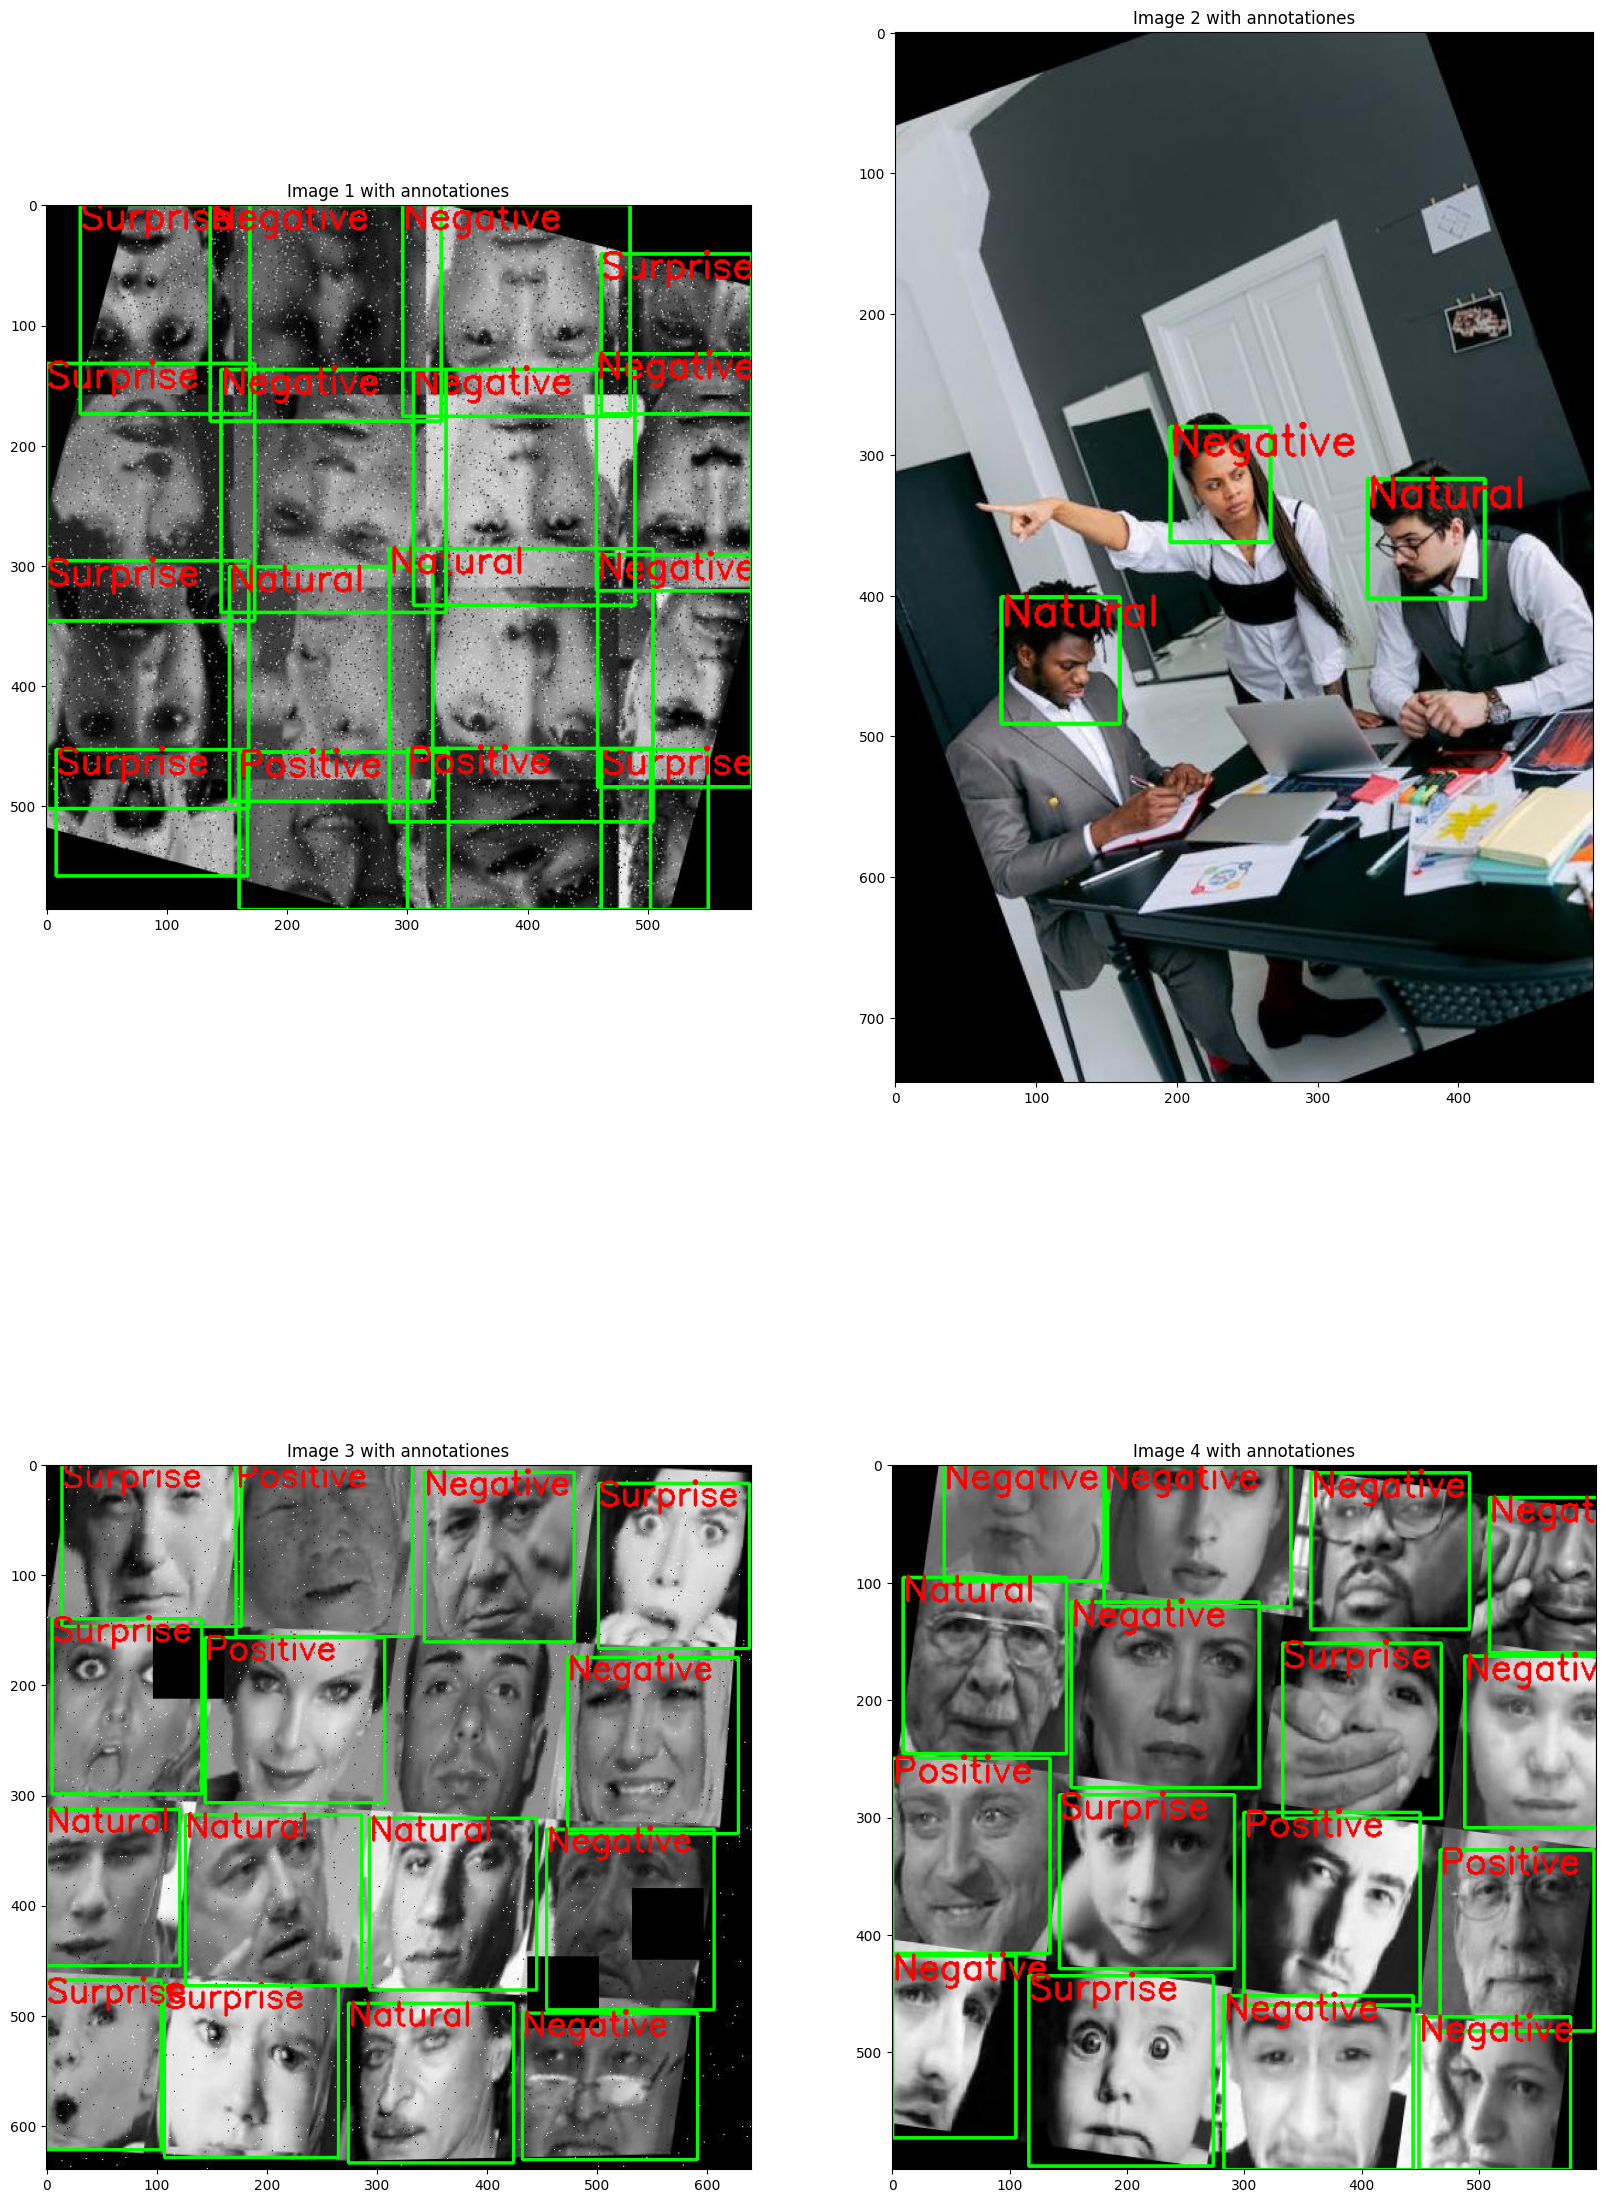

In [28]:
plot_image_with_annotations(image_root_old,annotations_file_original,number_of_iamges=4,multilabel=True)

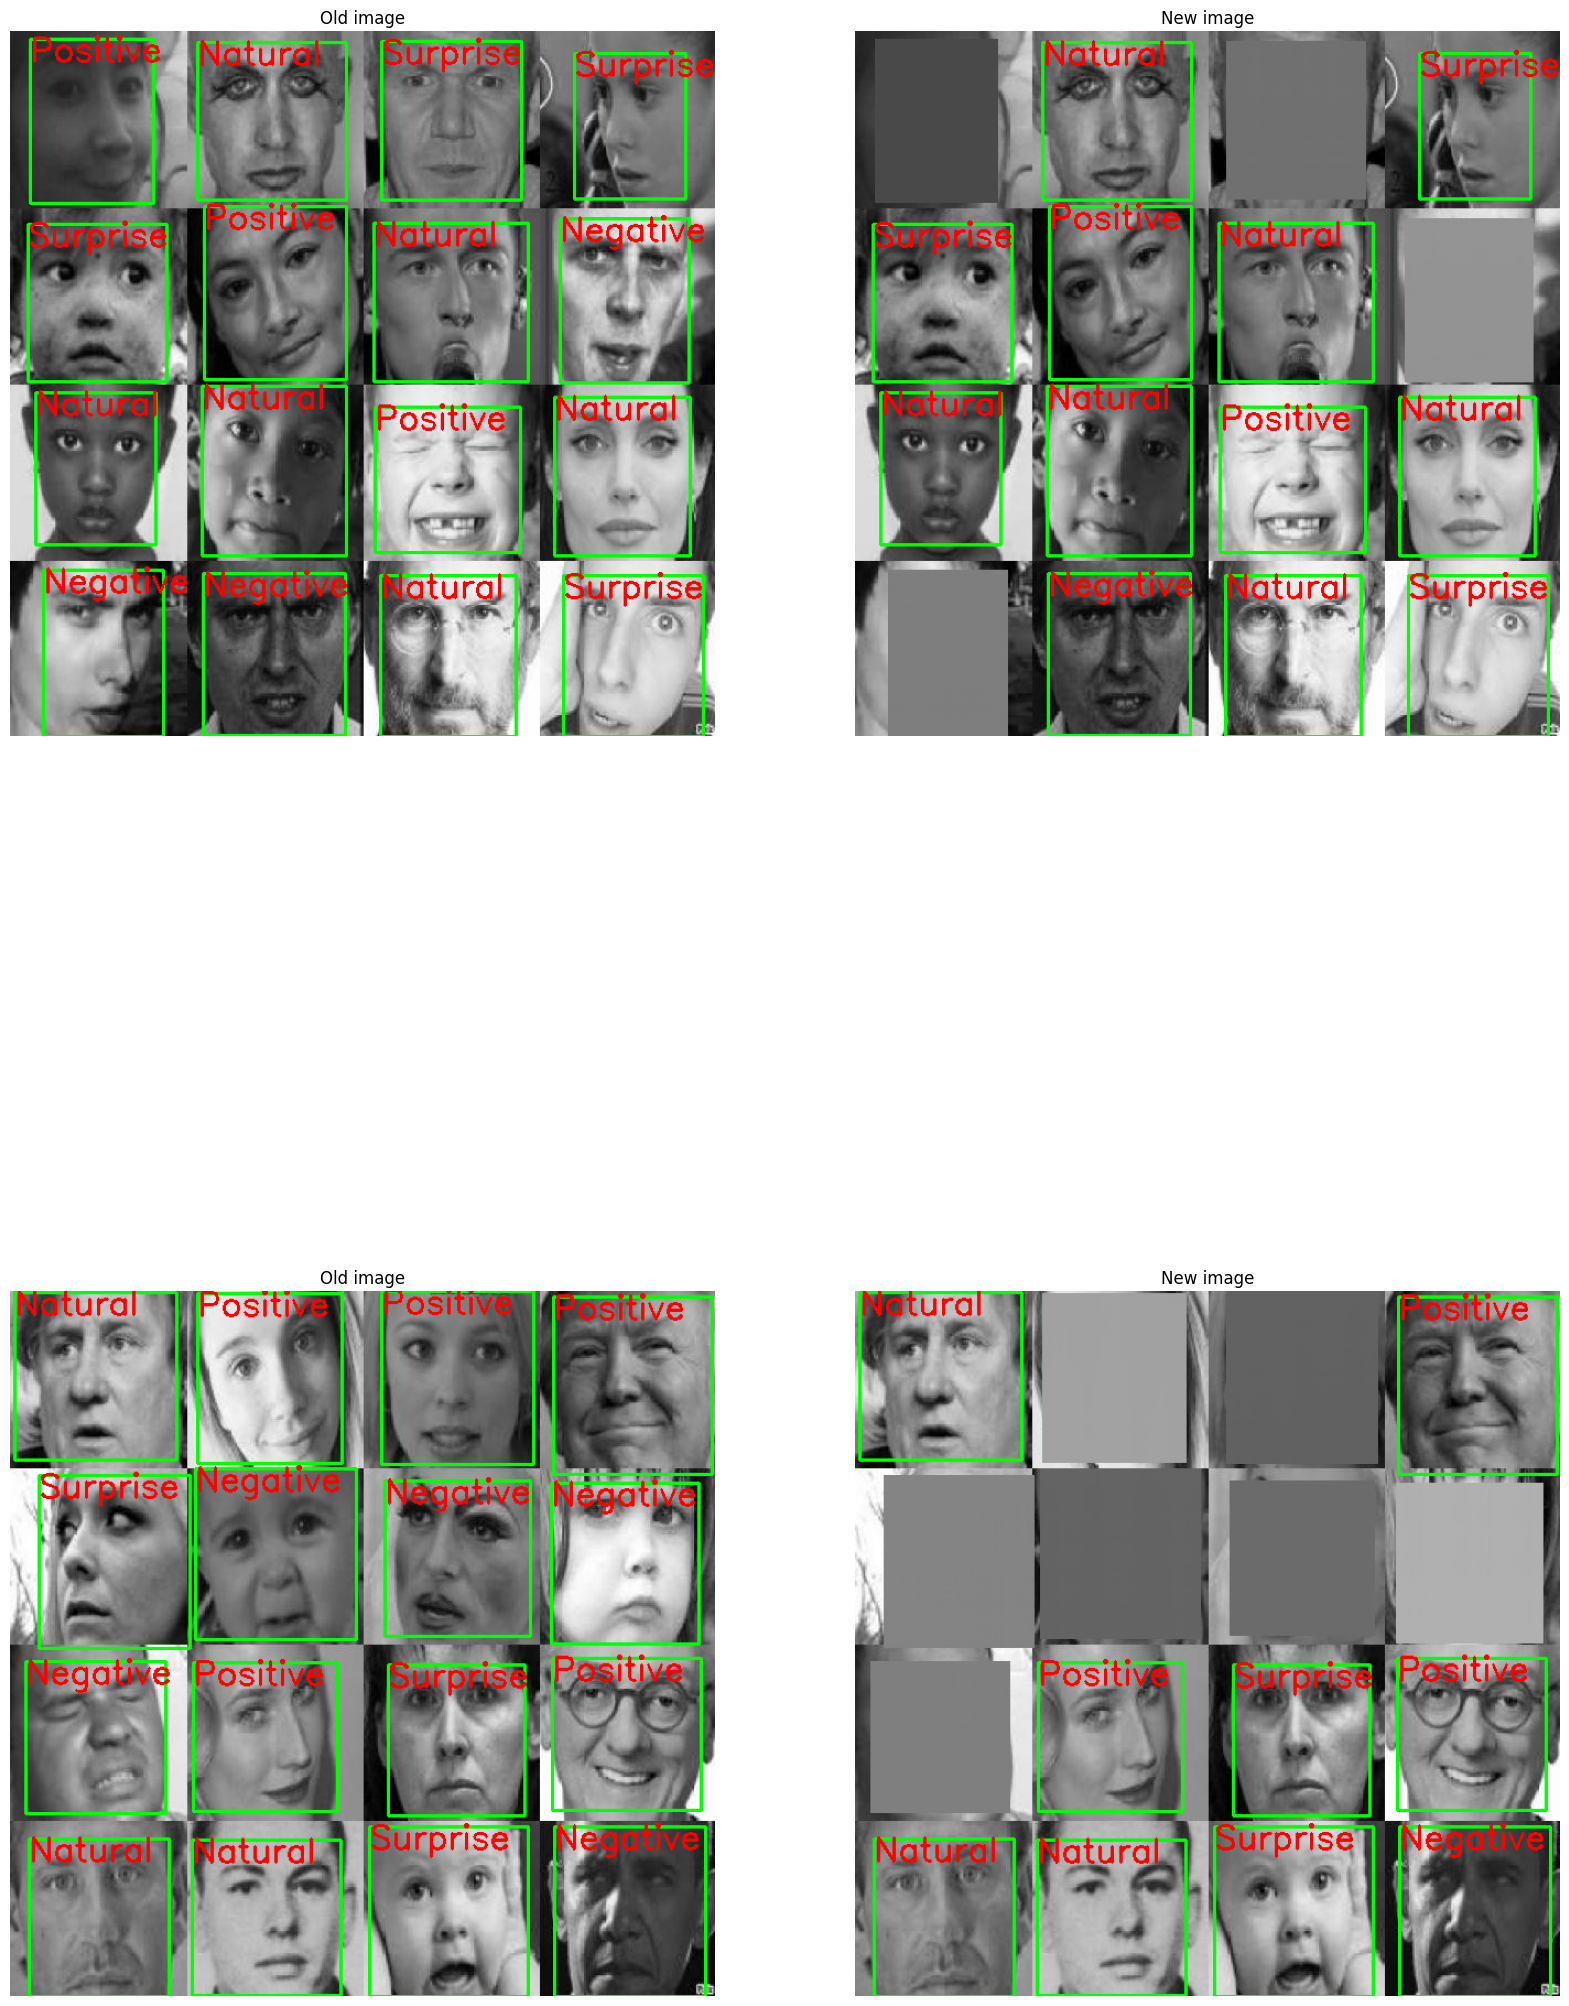

In [8]:
plot_image_with_annotations_comparison(image_root_new,image_root_old,annotations_file_balanced,
                                       annotations_file_original,number_of_iamges=2,shuffle=True)

## Balance problem before

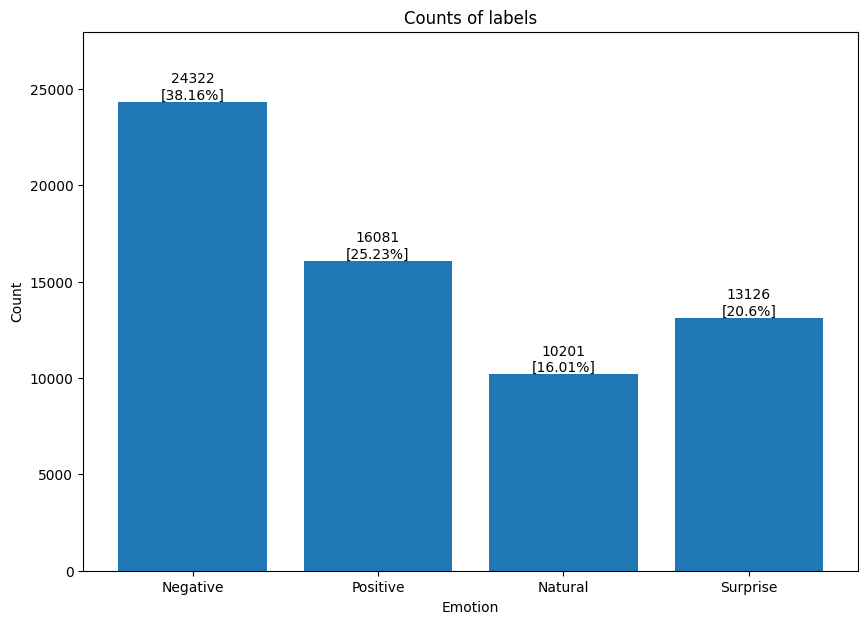

In [30]:
balanced_counts = get_label_counts('../data_engineering/data/full_data/full_nnps/nnps_annotations.json',df=True)
plot_label_counts(balanced_counts)

## Train test split

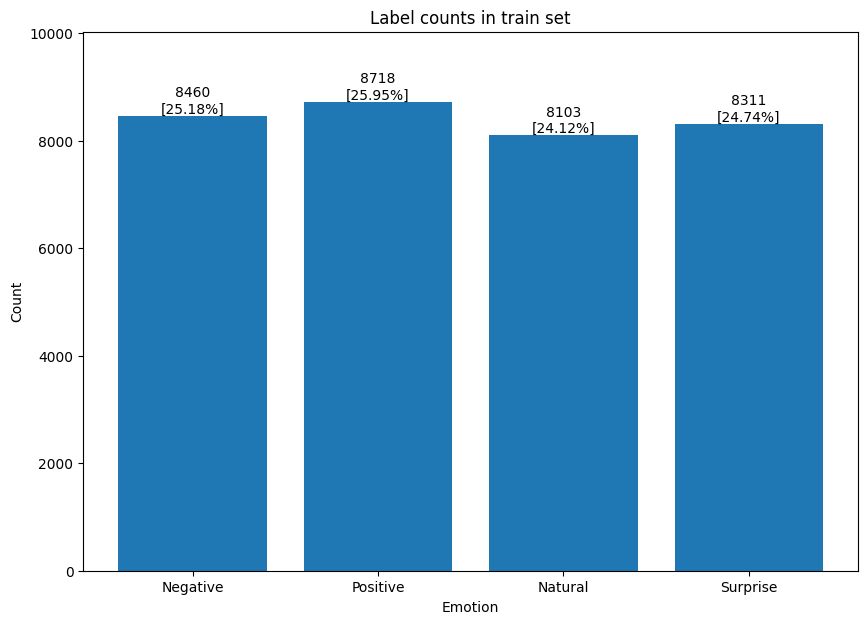

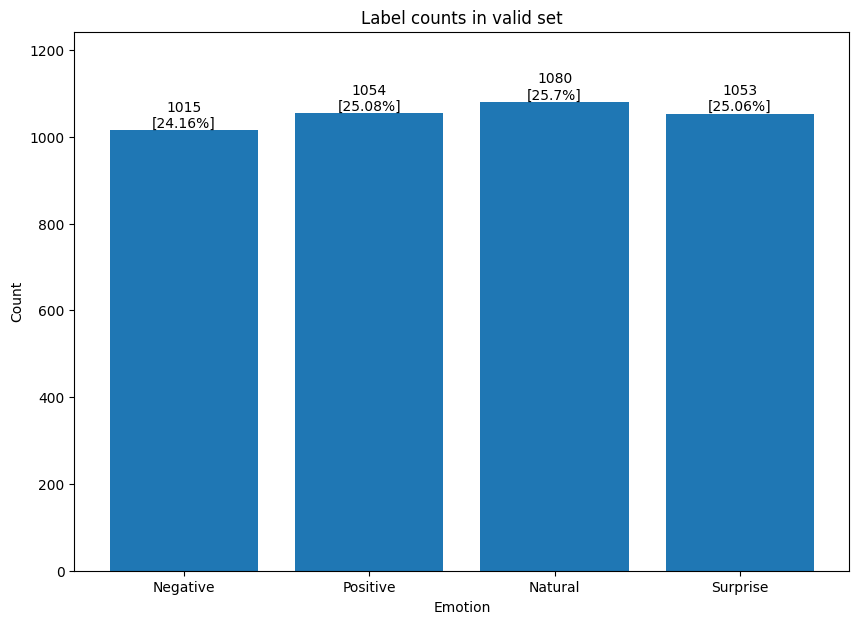

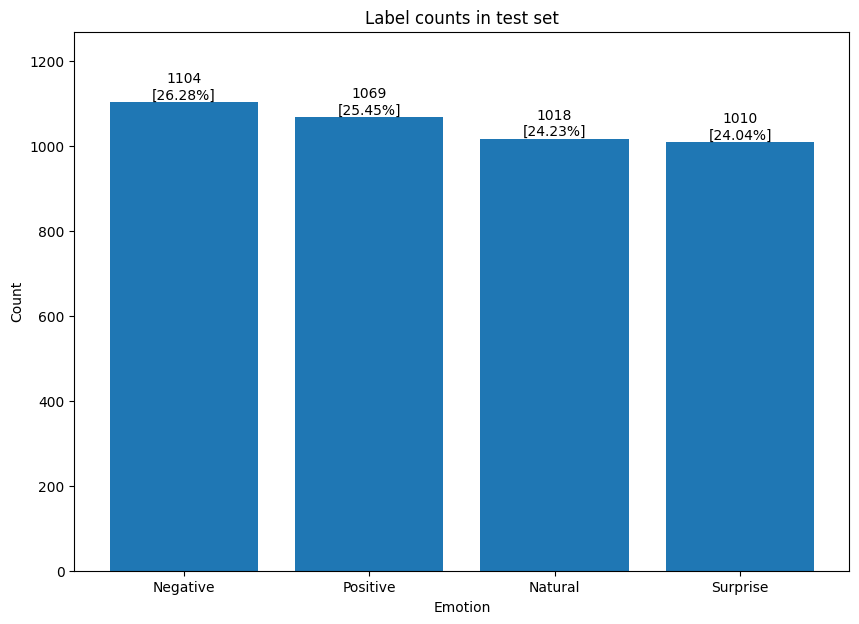

In [31]:
root = './data/model_data/nnps_coco_format/'
sum = 0

for split in ['train','valid','test']:

    annotation_file = os.path.join(root,split,"_annotations.json")
    counts = get_label_counts(annotation_file,True)

    sum += counts.Count.sum()
    
    plot_label_counts(counts,title=f"Label counts in {split} set")
    

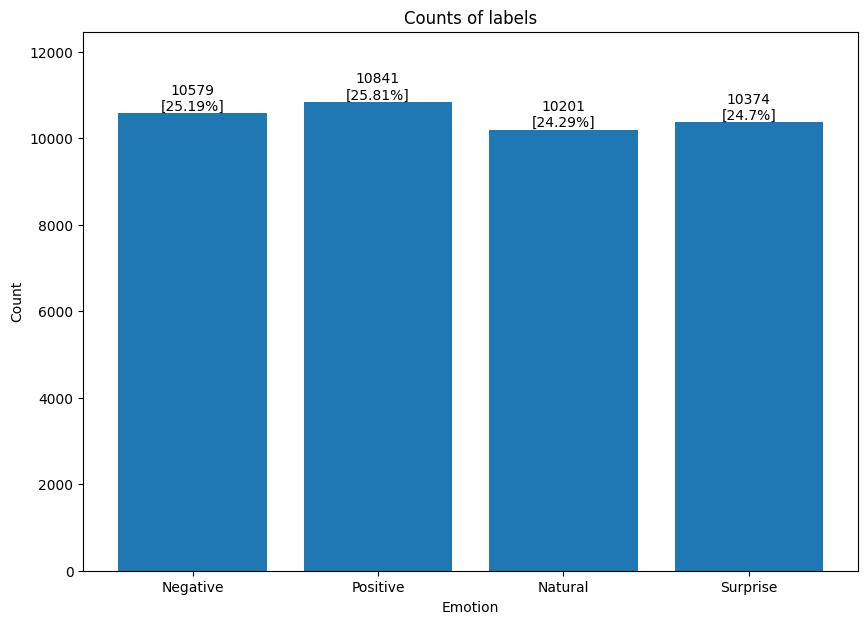

In [32]:
total_counts = get_label_counts("./data/full_data/balanced_nnps/balanced_dataset_annotations.json",True)
plot_label_counts(total_counts)

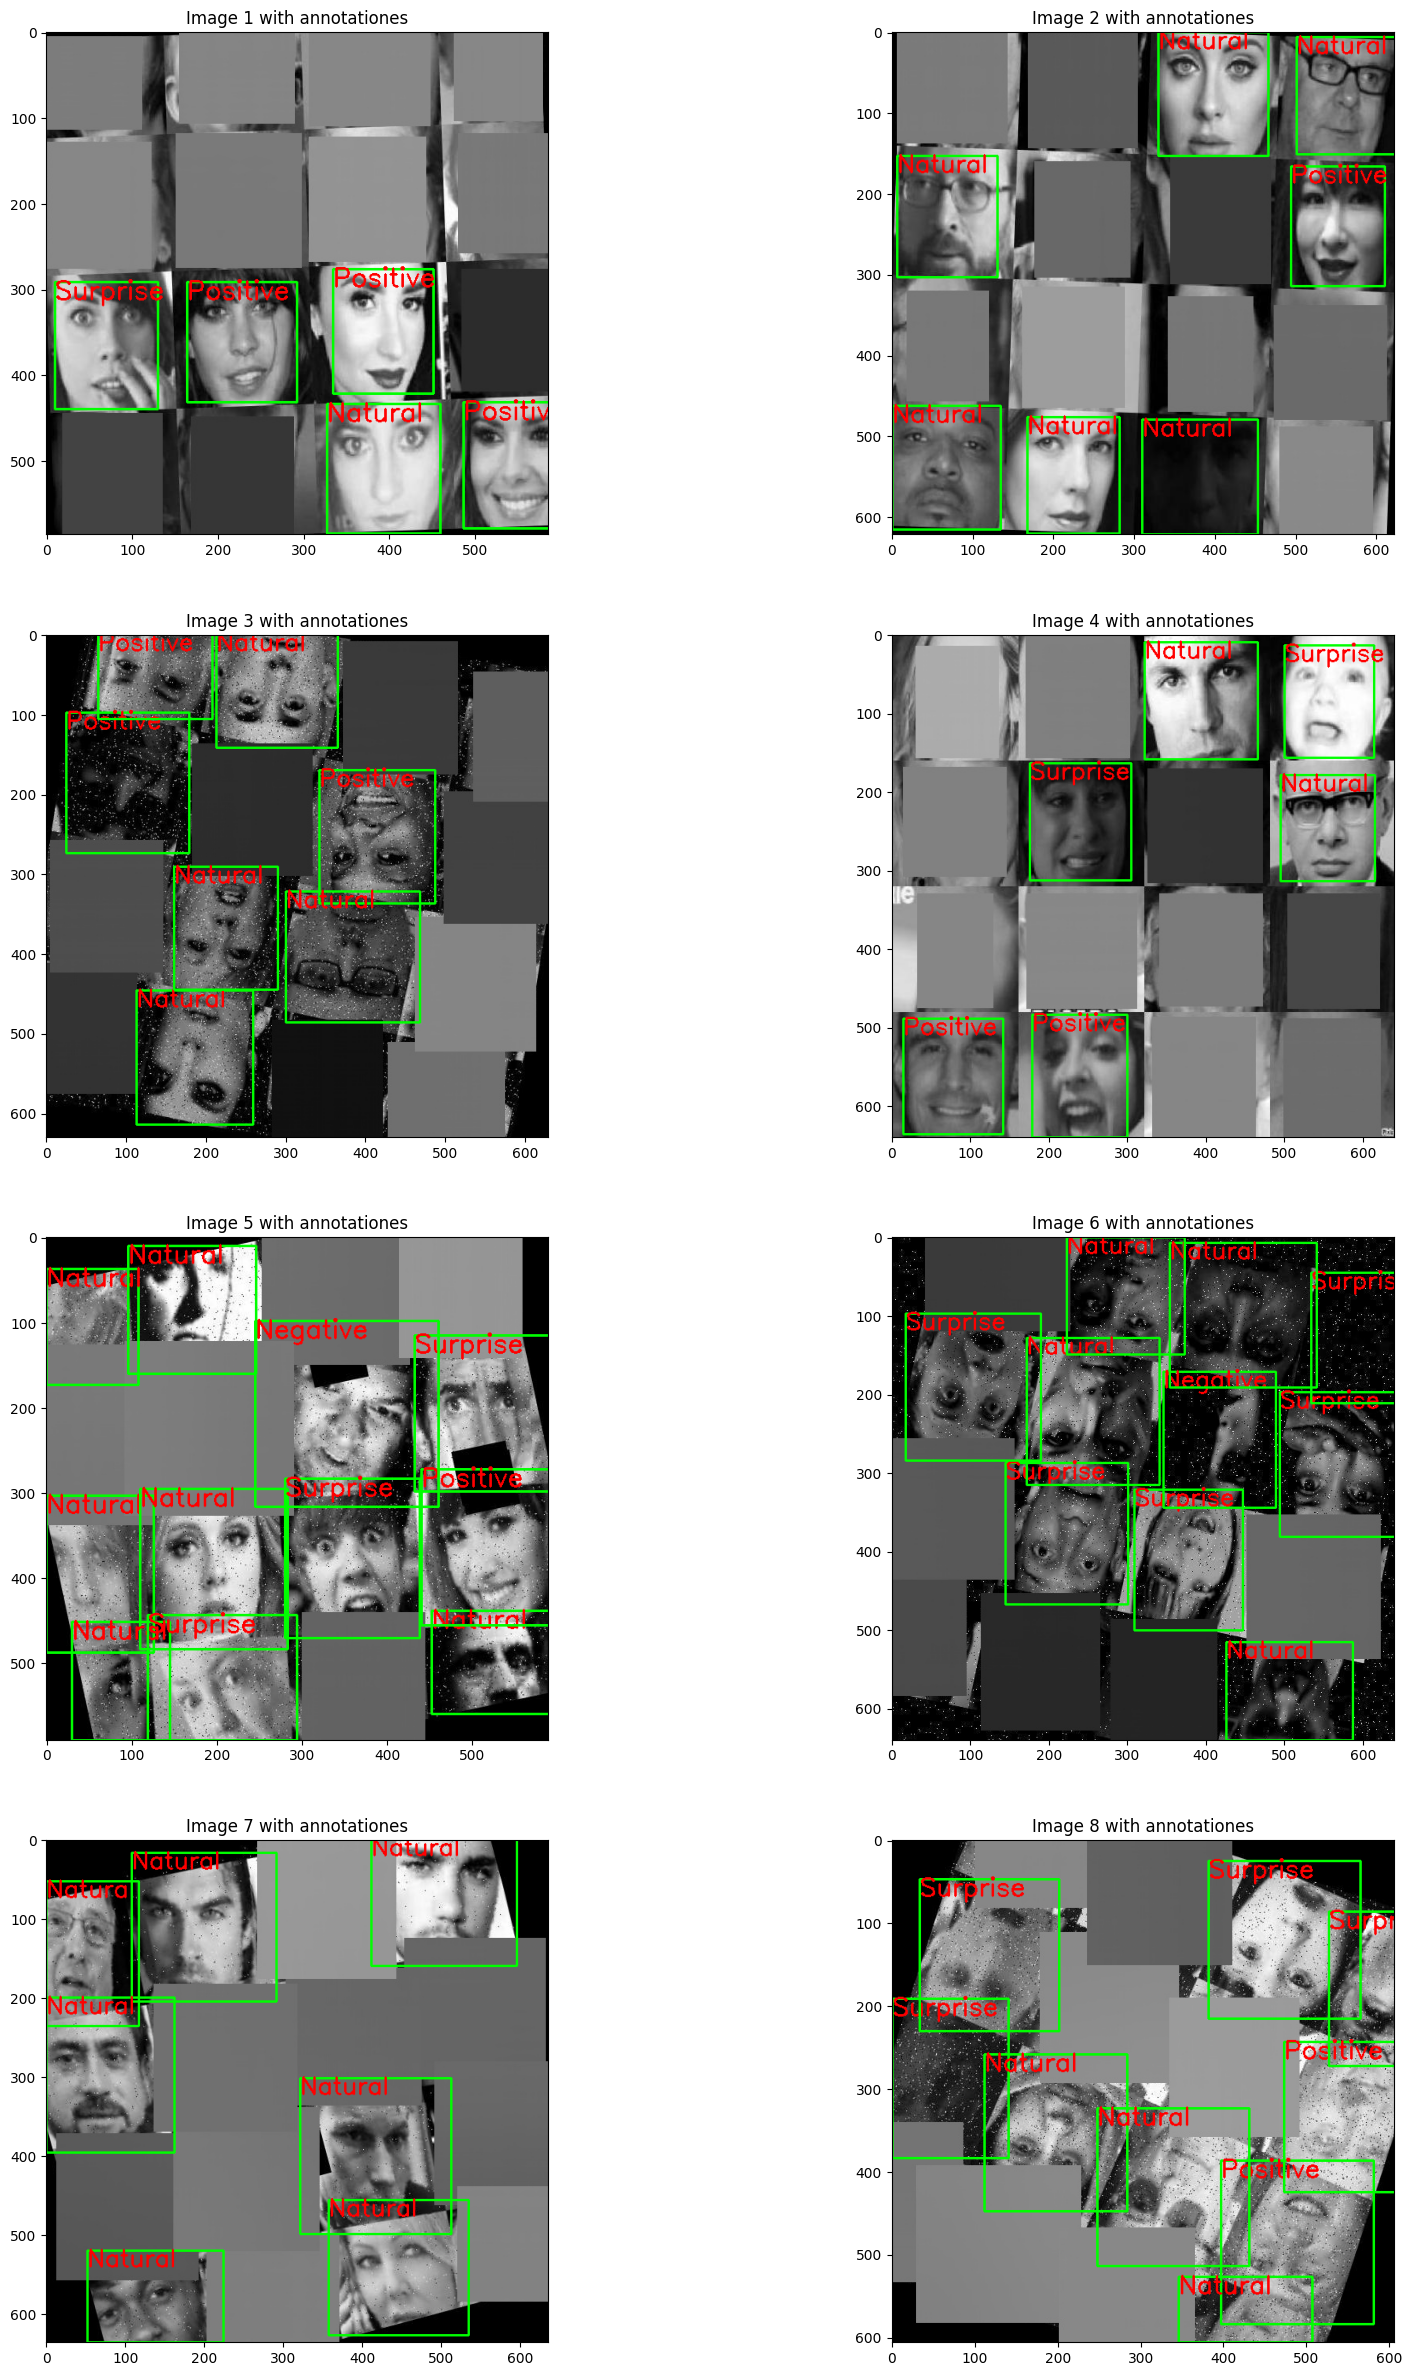

In [32]:
plot_image_with_annotations("./data/model_data/nnps_coco_format/valid/","./data/model_data/nnps_coco_format/valid/_annotations.json",multilabel=True)

In [33]:
get_label_counts("./data/full_data/balanced_nnps/balanced_dataset_annotations.json",False,True)


({'Negative': 10579, 'Positive': 10841, 'Natural': 10201, 'Surprise': 10374},
 {0: 'Negative', 1: 'Positive', 2: 'Natural', 3: 'Surprise'})